In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [7]:
data=pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [10]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

this means the columns doesnt have a null value


<ipython-input-11-92cd547e9c3c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-11-92cd547e9c3c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-11-92cd547e9c3c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed 

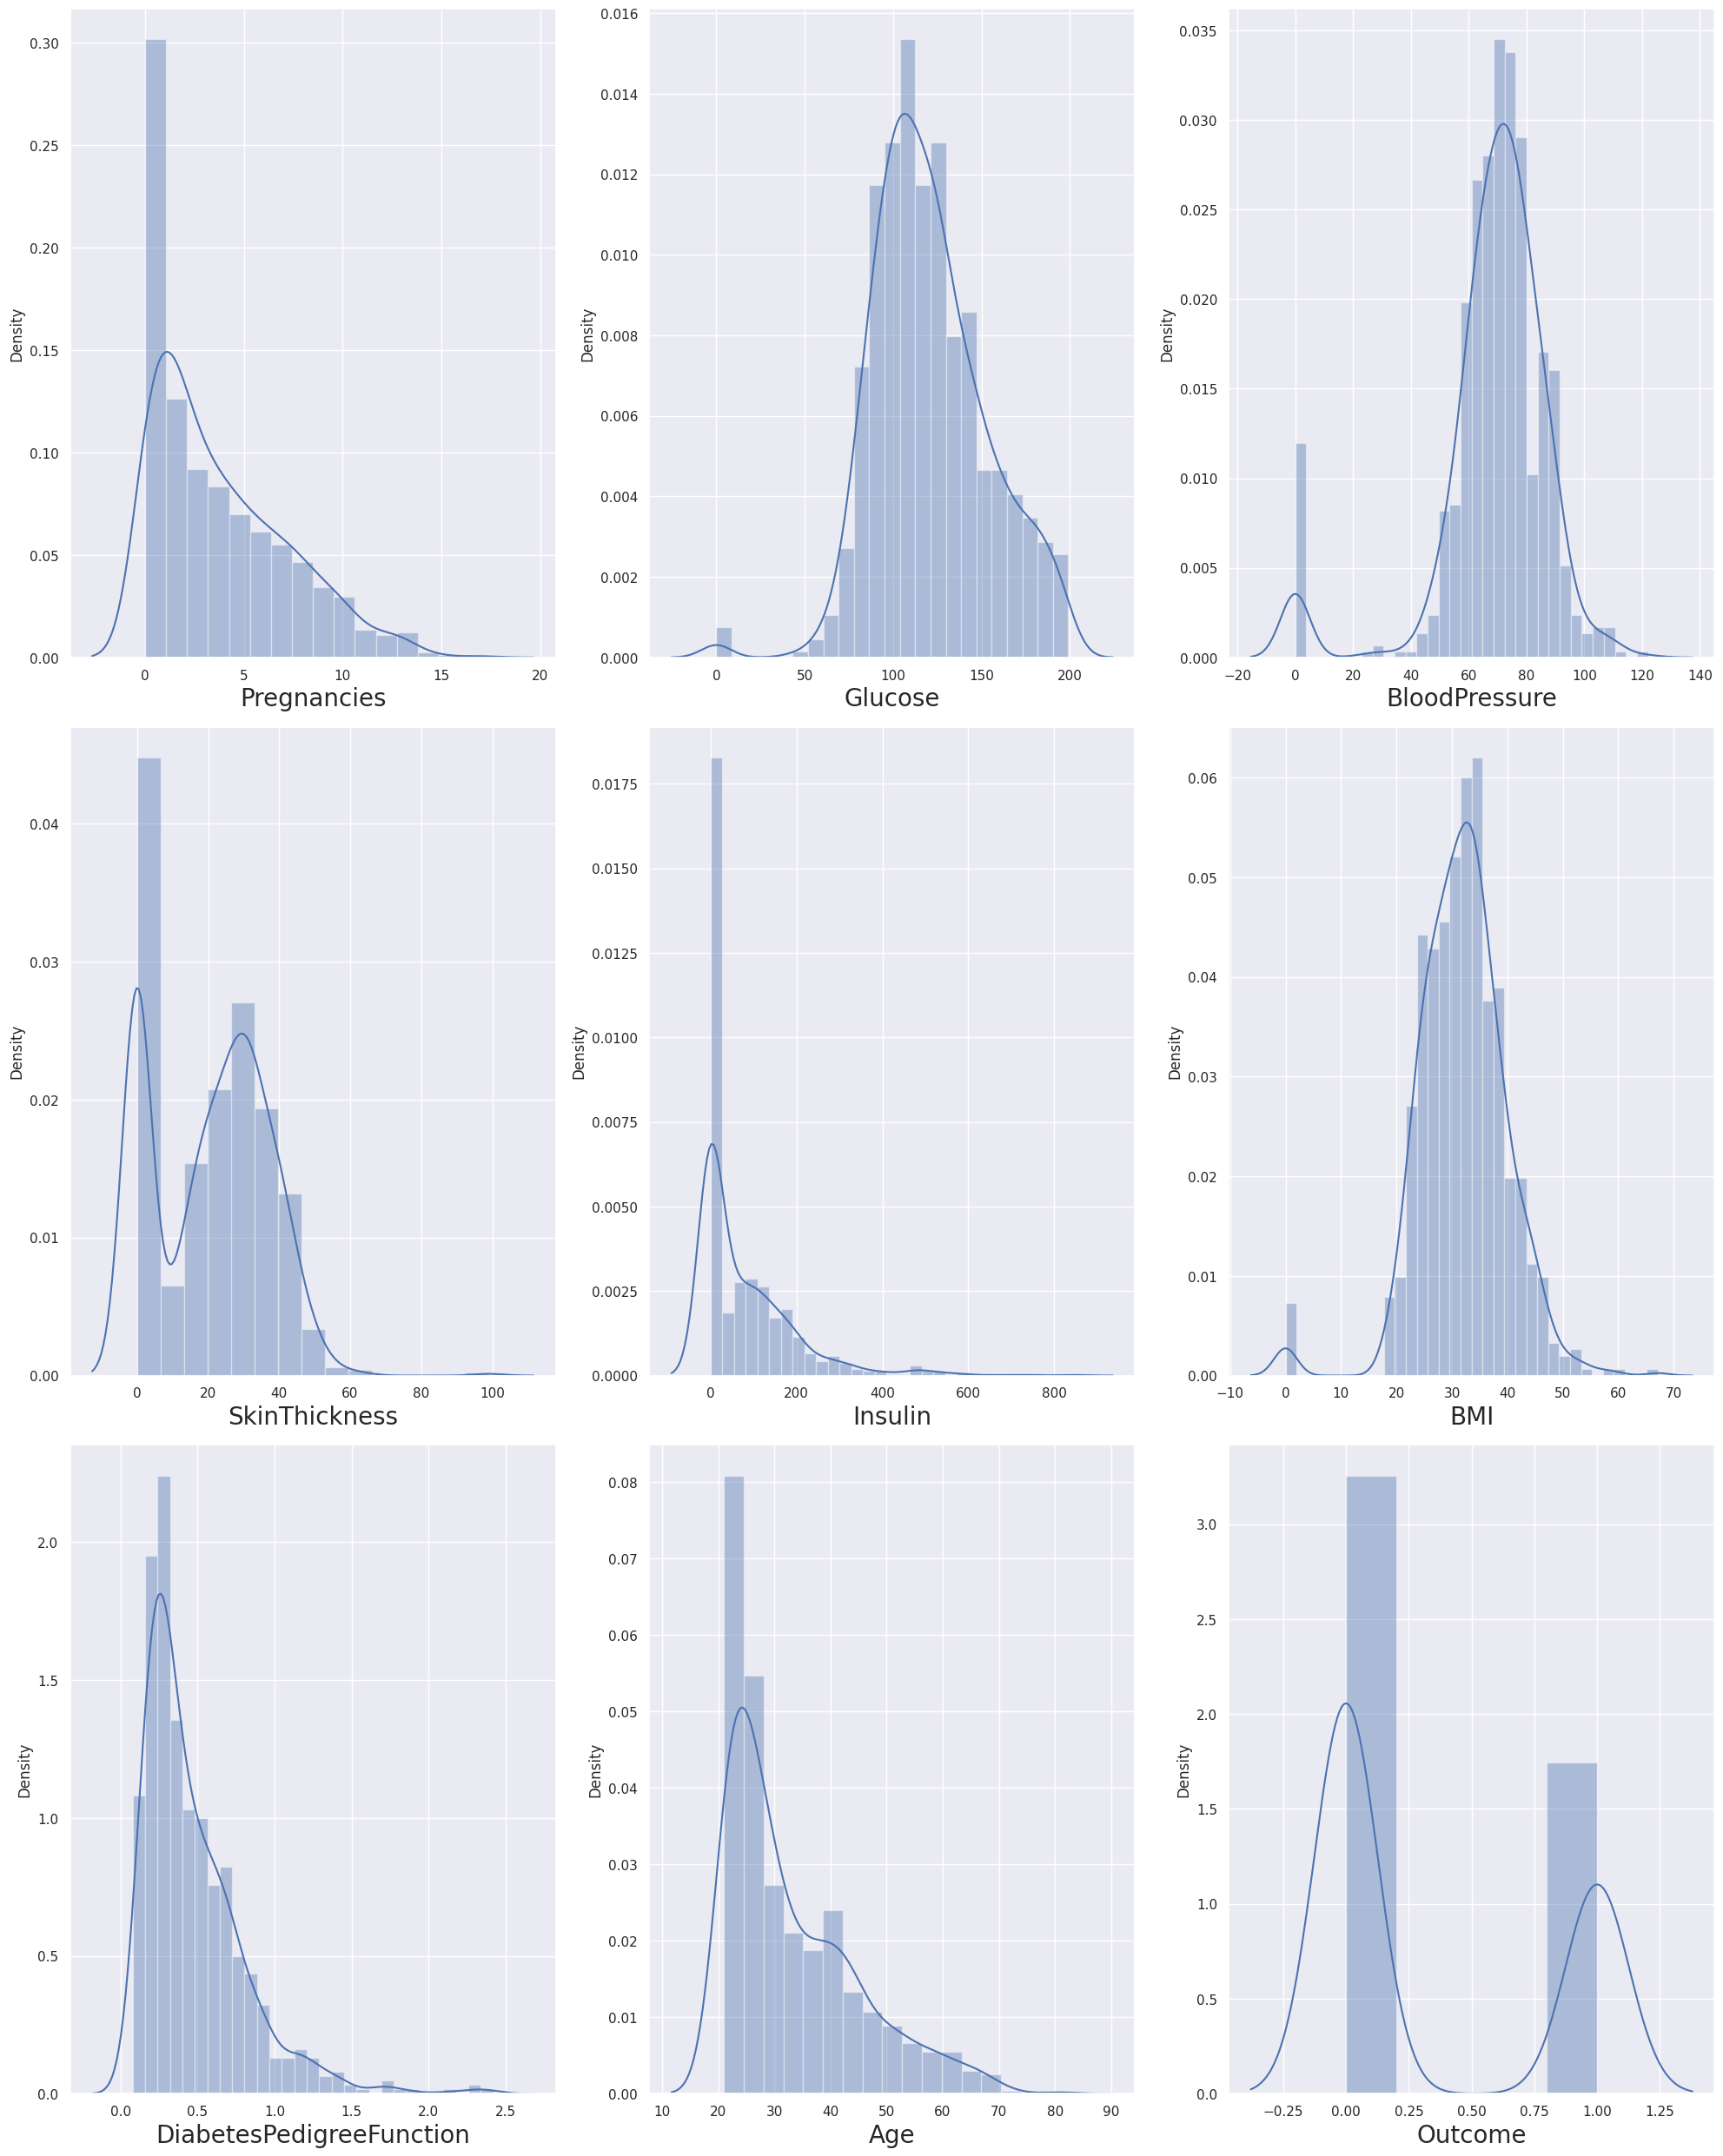

In [11]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.tight_layout()

We can see there is some skewness in the data, let's deal with data.

Also, we can see there few data for columns Glucose , Insulin, skin thickenss, BMI and Blood Pressure which have value as 0. That's not possible,right? you can do a quick search to see that one cannot have 0 values for these. Let's deal with that. we can either remove such data or simply replace it with their respective mean values. Let's do the latter.

In [12]:
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())


<ipython-input-13-3deab330855d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-13-3deab330855d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[column])
<ipython-input-13-3deab330855d>:7: UserWarning: 

`distplot` is a deprecated function and will be removed 

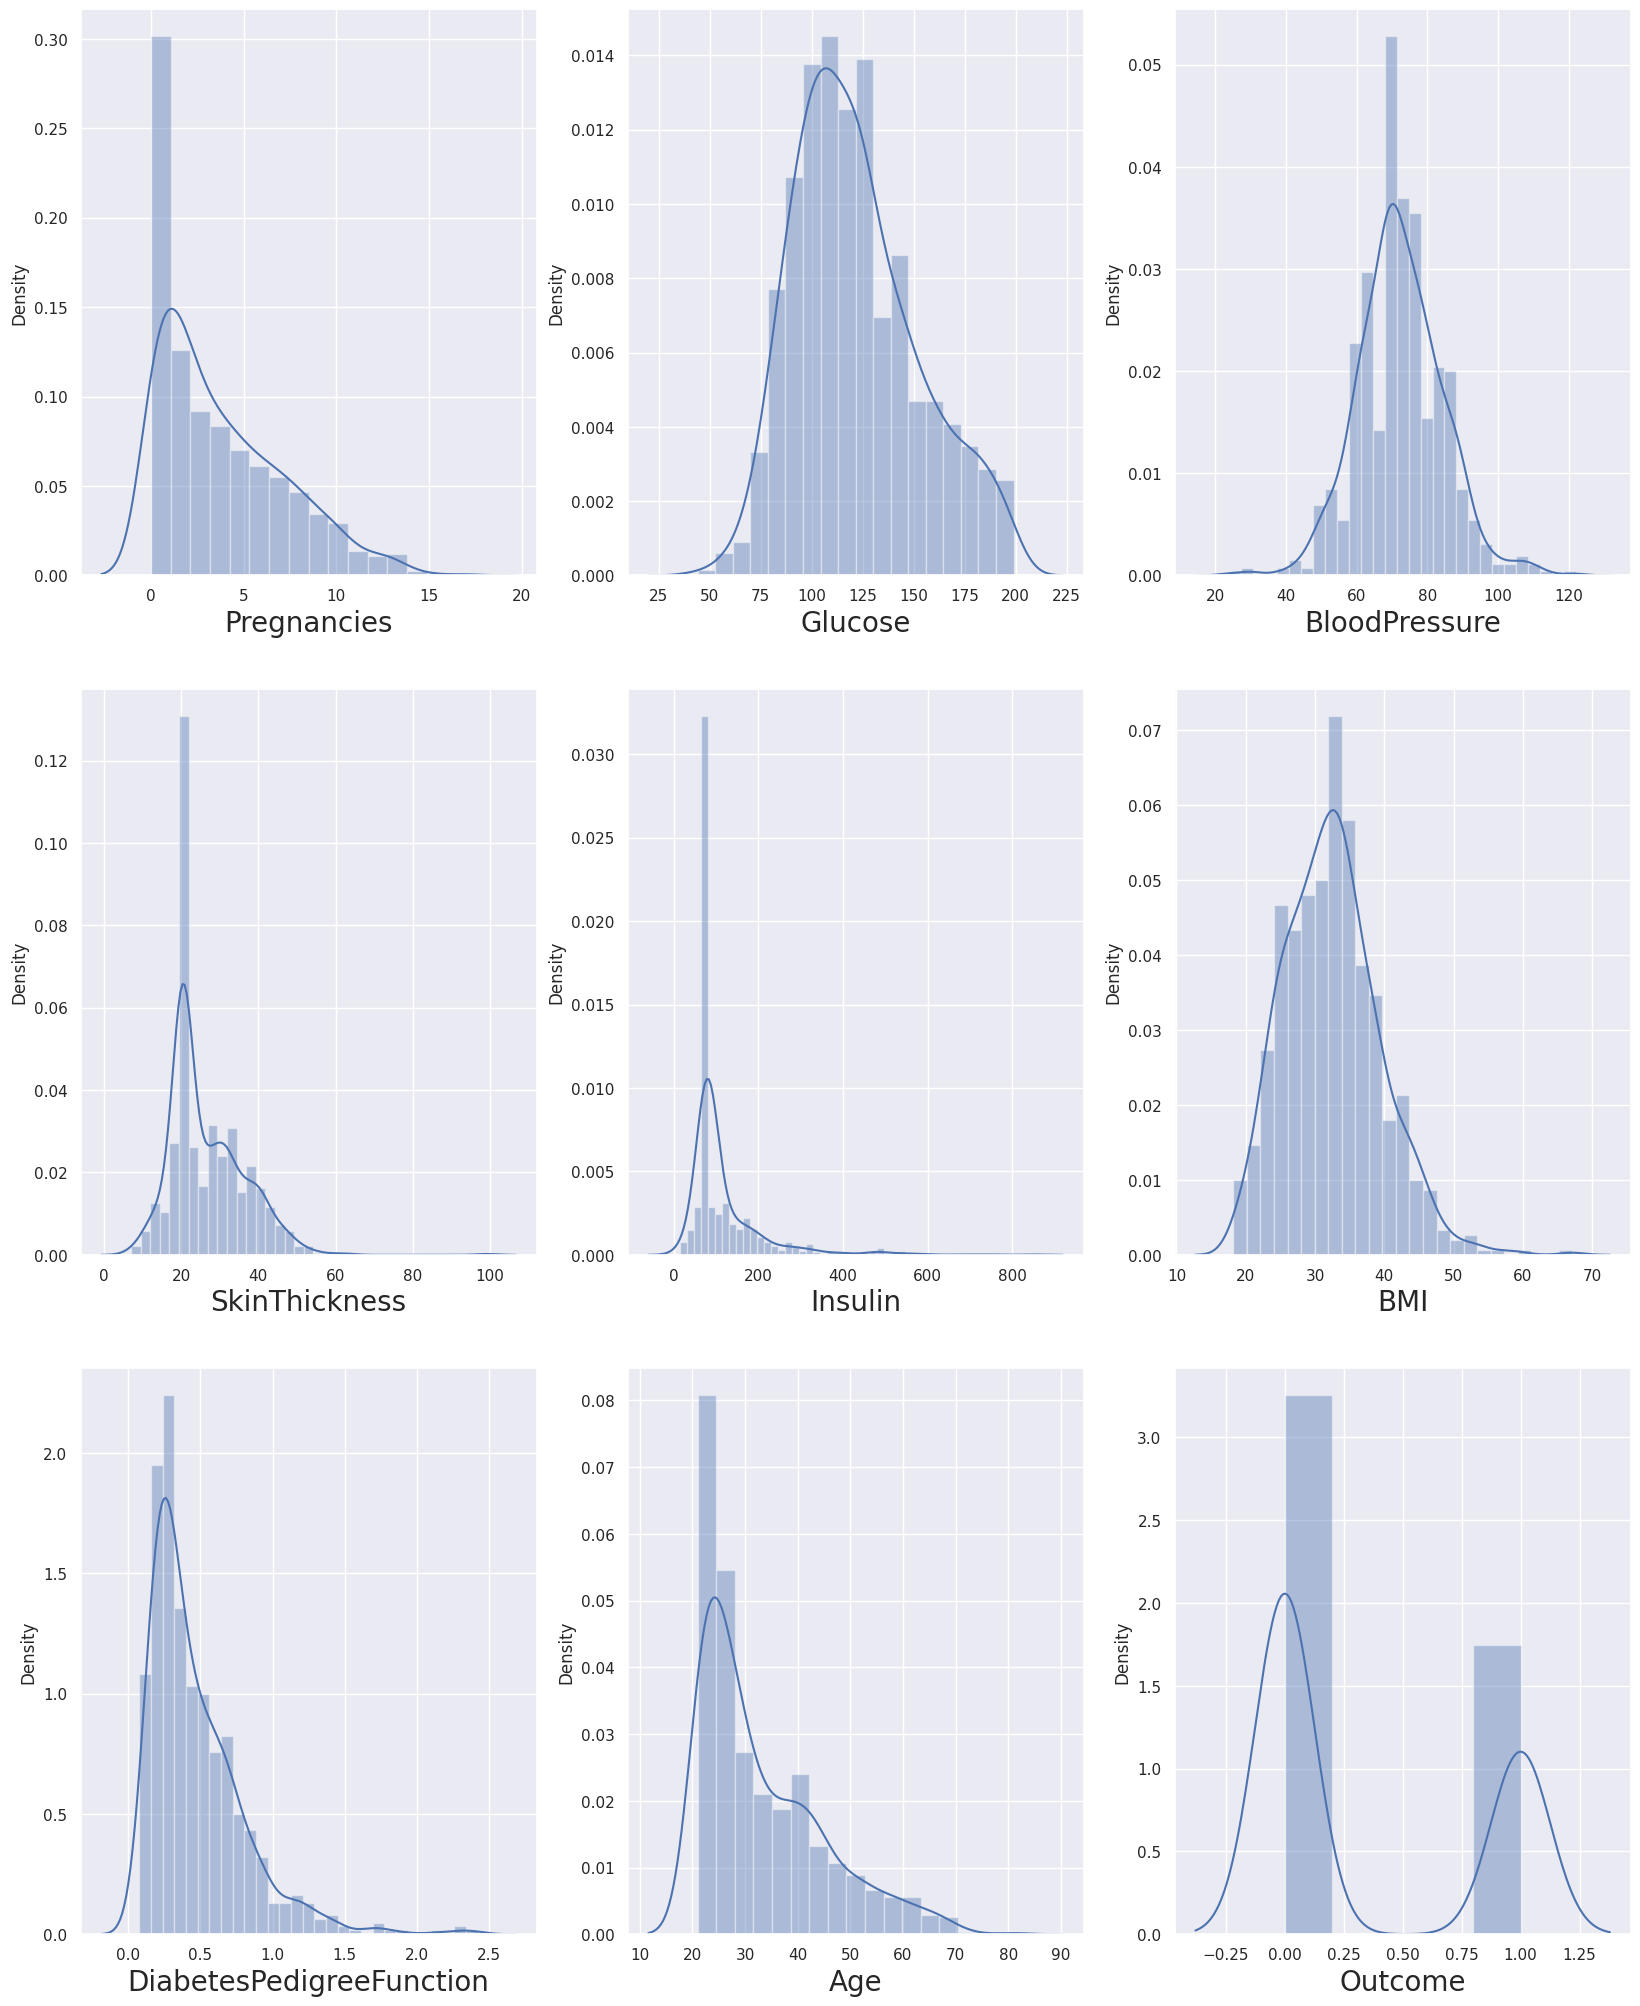

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in data:
  if plotnumber<=9:
    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data[column])
    plt.xlabel(column,fontsize=20)
  plotnumber+=1
plt.show()


<Axes: >

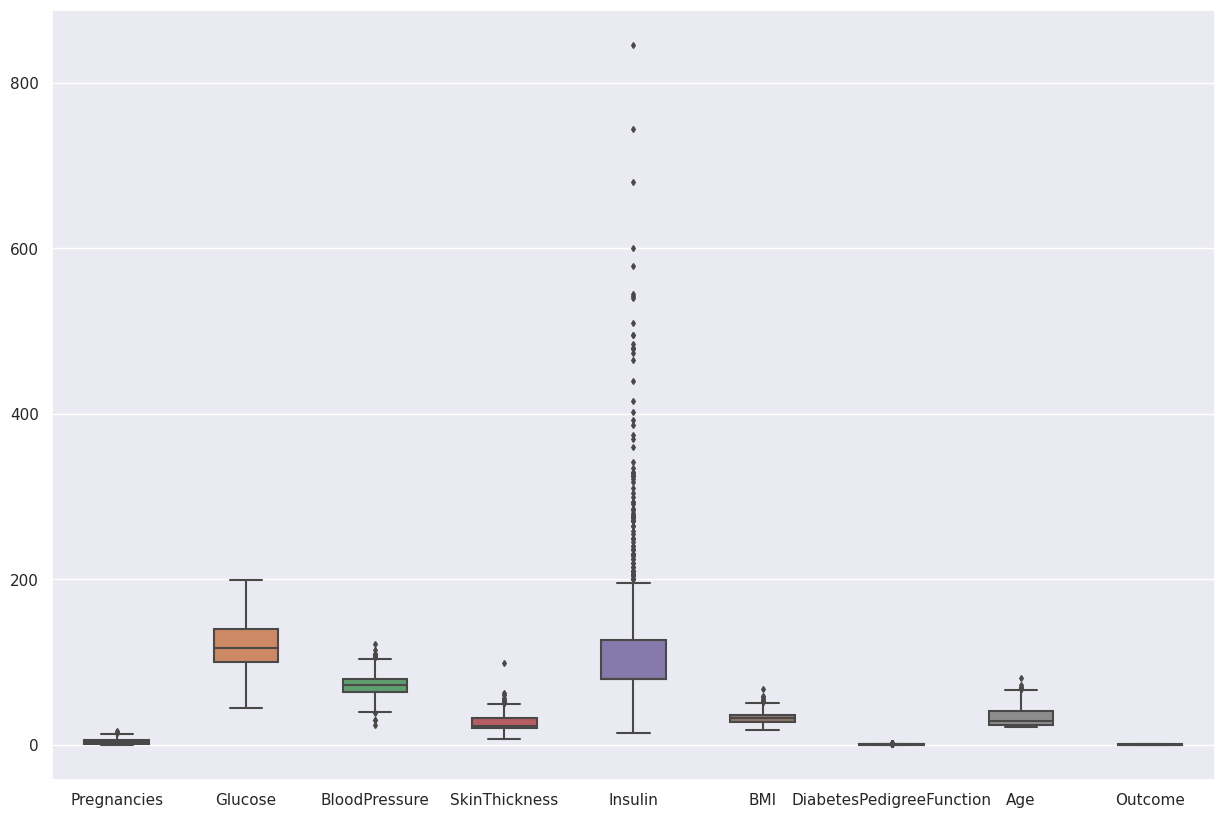

In [14]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [15]:
q=data['Pregnancies'].quantile(0.98)
#we are removing top 2% of our data to remove the outliers
data_cleaned=data[data['Pregnancies']<q]
#this means data must like within the remaingin 98% quartile and shouldnt be in the top 2%
q=data_cleaned['BMI'].quantile(0.99)
data_cleaned=data_cleaned[data['BMI']<q]

q=data_cleaned['SkinThickness'].quantile(0.99)
data_cleaned=data_cleaned[data['SkinThickness']<q]

q=data_cleaned['Insulin'].quantile(0.95)
data_cleaned=data_cleaned[data['Insulin']<q]

q=data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned=data_cleaned[data['DiabetesPedigreeFunction']<q]

q=data_cleaned['DiabetesPedigreeFunction'].quantile(0.99)
data_cleaned=data_cleaned[data['DiabetesPedigreeFunction']<q]

q=data_cleaned['Age'].quantile(0.99)
data_cleaned=data_cleaned[data['Age']<q]


<ipython-input-15-95233b62b944>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned=data_cleaned[data['BMI']<q]
<ipython-input-15-95233b62b944>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned=data_cleaned[data['SkinThickness']<q]
<ipython-input-15-95233b62b944>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned=data_cleaned[data['Insulin']<q]
<ipython-input-15-95233b62b944>:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned=data_cleaned[data['DiabetesPedigreeFunction']<q]
<ipython-input-15-95233b62b944>:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned=data_cleaned[data['DiabetesPedigreeFunction']<q]
<ipython-input-15-95233b62b944>:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_cleaned=data_cleaned[data['Age']<q]


<ipython-input-16-b3e30eef6e5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
<ipython-input-16-b3e30eef6e5a>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned[column])
<ipython-input-16-b3e30eef6e5a>:8: UserWarning: 

`distplot` is a deprecated function and 

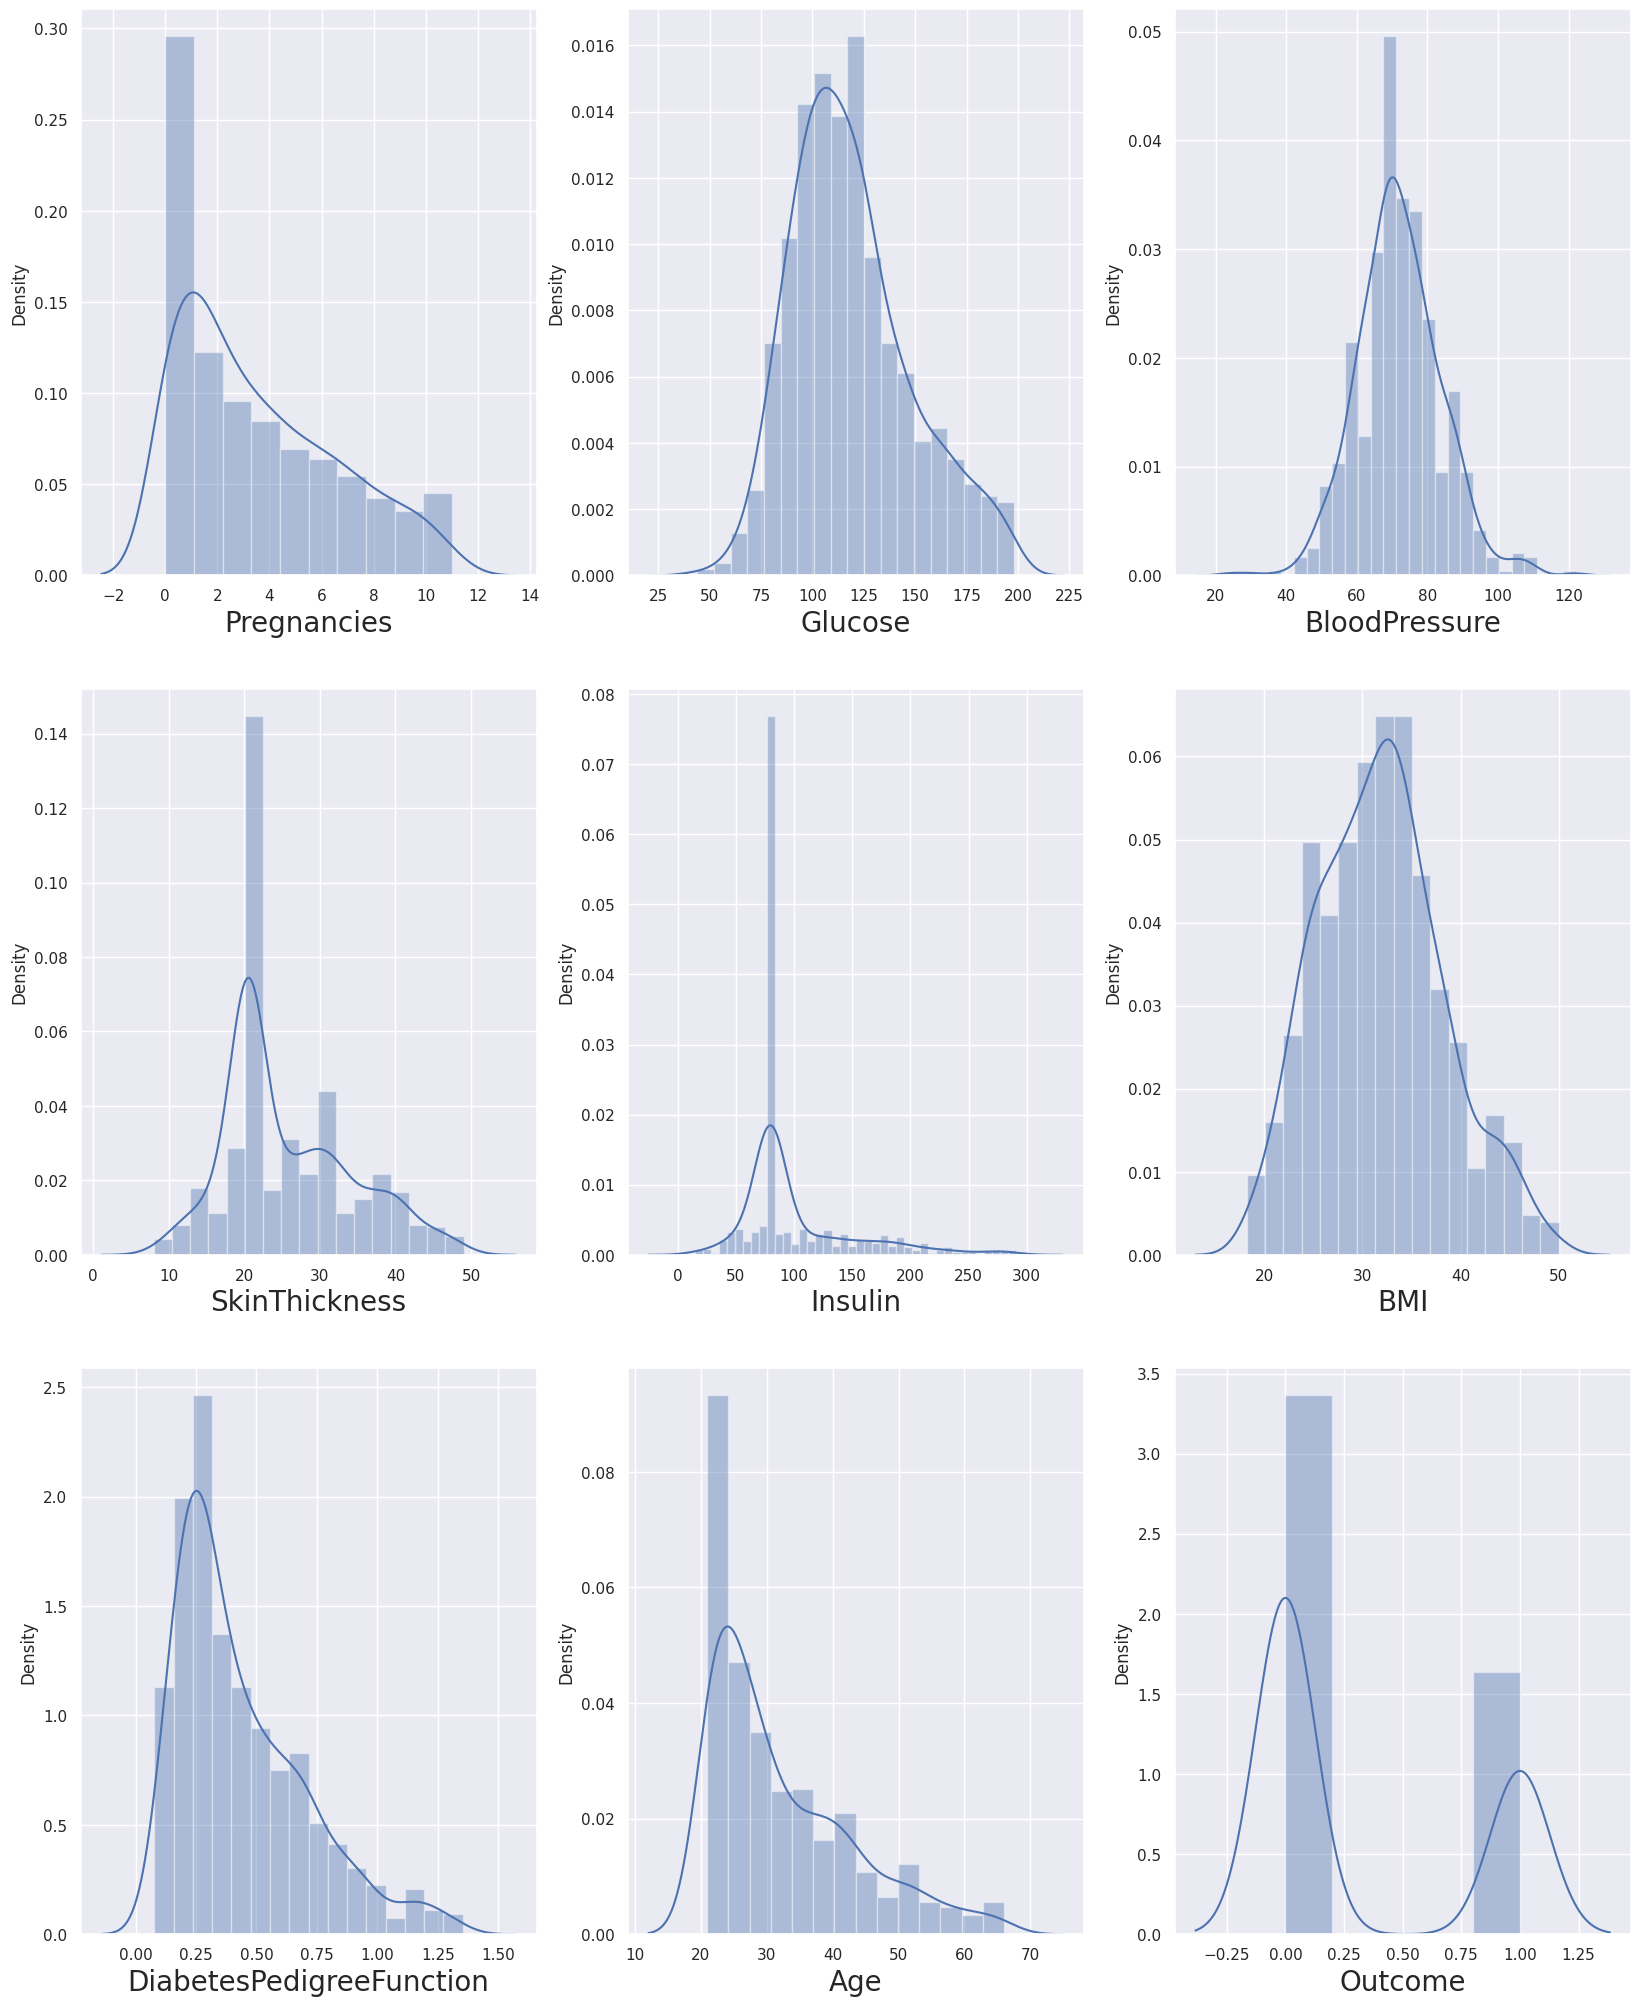

In [16]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber =1

for column in data_cleaned:
  if plotnumber<=9:

    ax=plt.subplot(3,3,plotnumber)
    sns.distplot(data_cleaned[column])
    plt.xlabel(column,fontsize=20)

  plotnumber+=1
plt.show()

<Axes: >

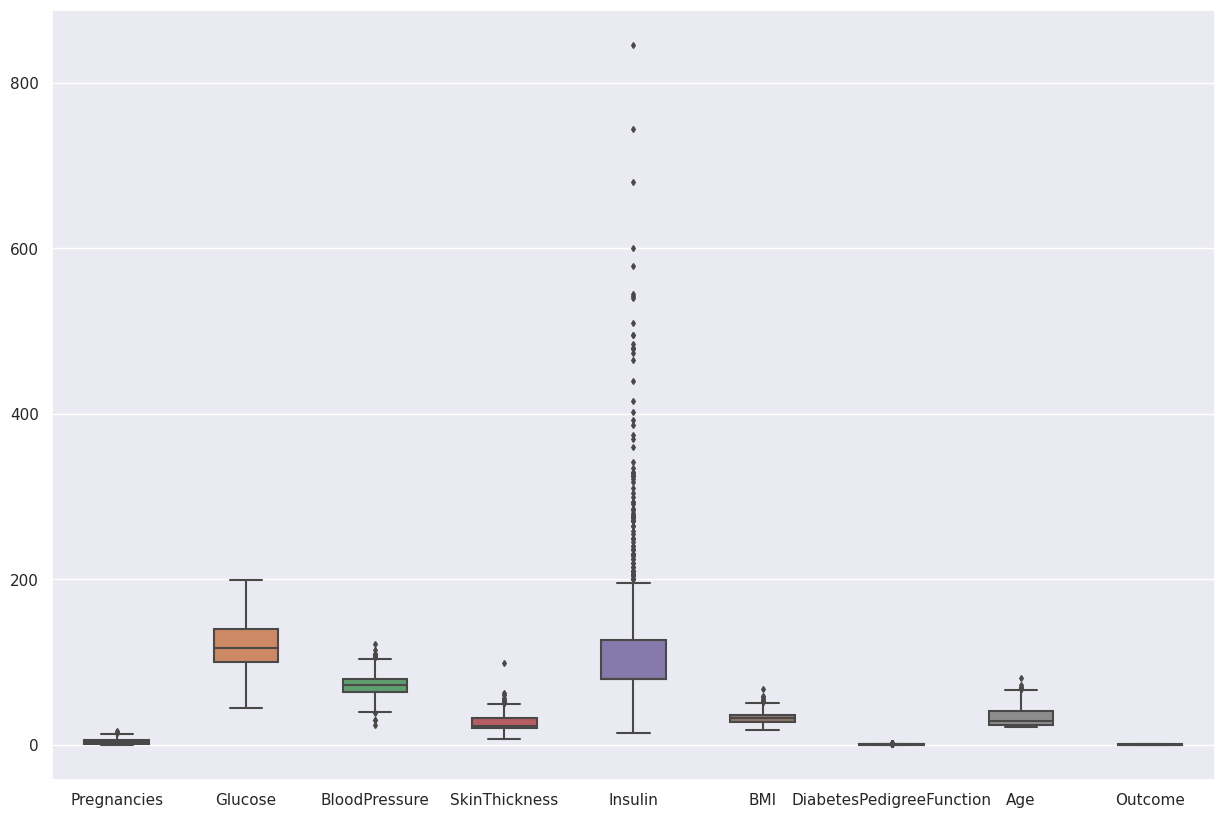

In [17]:
fig,ax=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,width=0.5,ax=ax,fliersize=3)

In [18]:
X=data.drop(columns =['Outcome'])
y=data['Outcome']

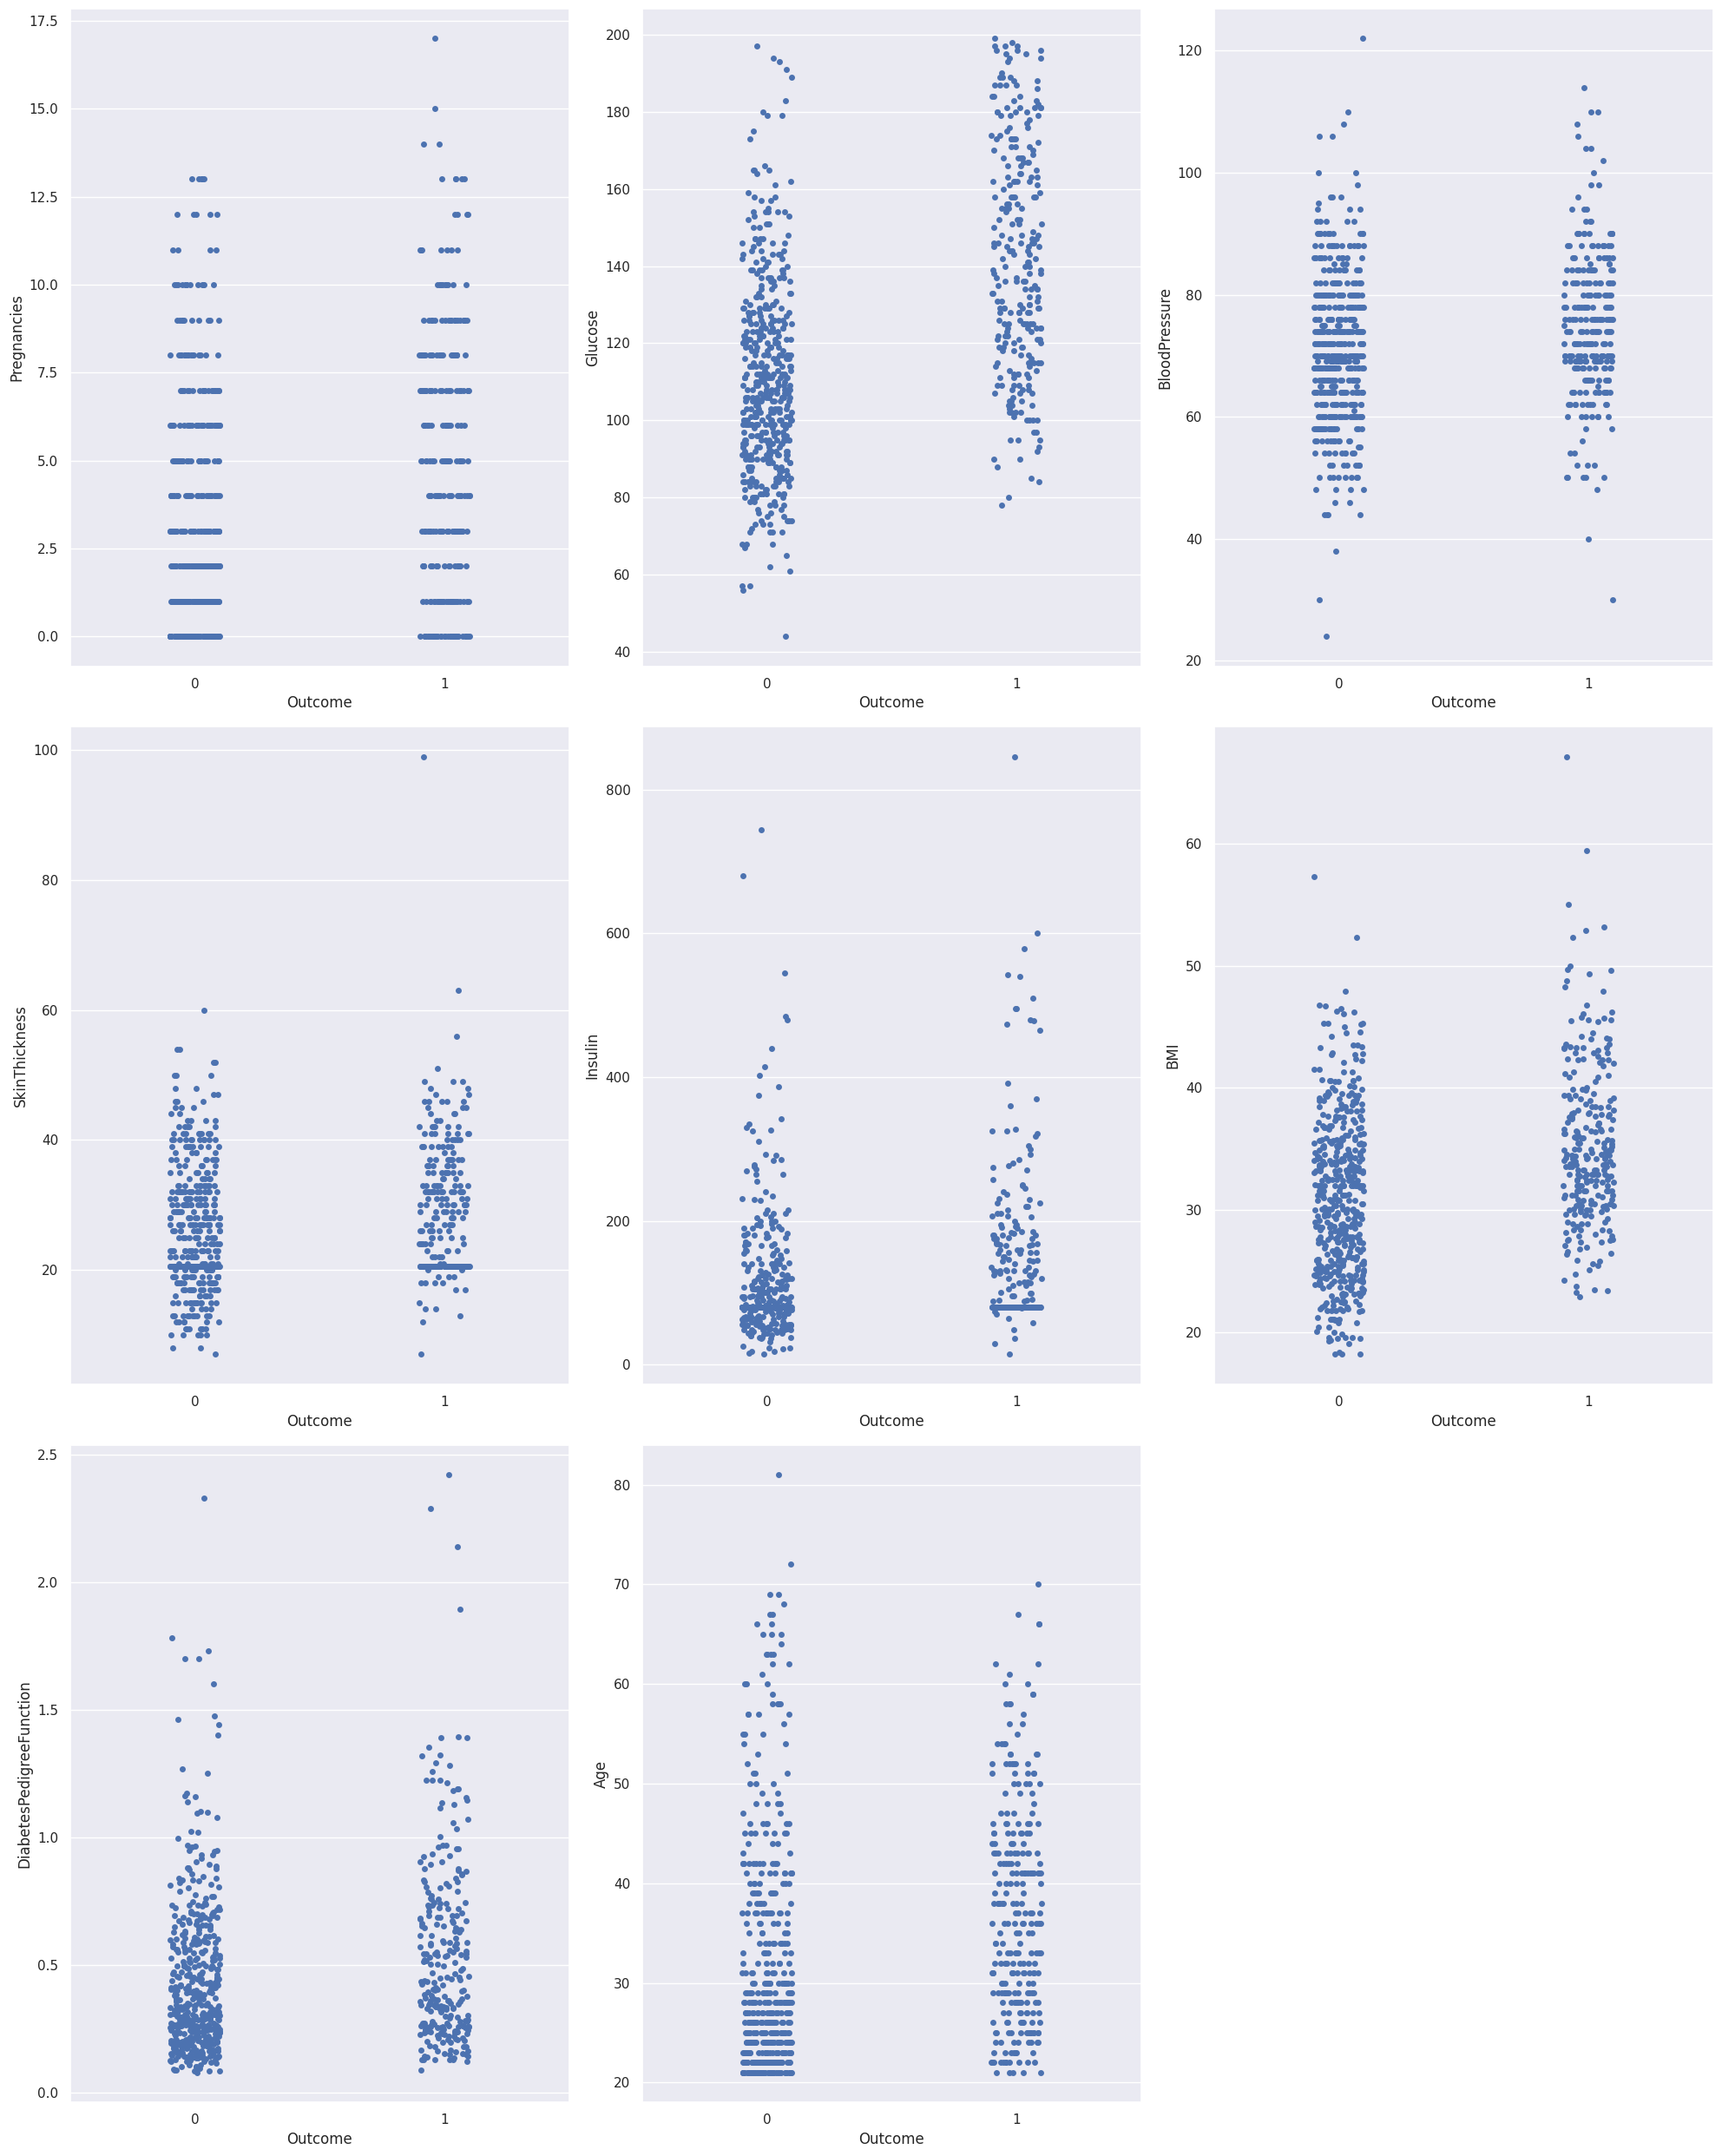

In [19]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in X:
  if plotnumber<=9:

    ax=plt.subplot(3,3,plotnumber)
    sns.stripplot(x=y,y=X[column])
  plotnumber+=1
plt.tight_layout()


In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)
X_train.shape,X_test.shape

((576, 8), (192, 8))

In [21]:
import bz2,pickle
def scaler_standard(X_train,X_test):
  scaler=StandardScaler()
  X_train_scaled=scaler.fit_transform(X_train)
  X_test_scaled=scaler.transform(X_test)

  file=bz2.BZ2File('standardScalar.pkl','wb')
  pickle.dump(scaler,file)
  file.close()

  return X_train_scaled,X_test_scaled

In [22]:
X_train_scaled,X_test_scaled=scaler_standard(X_train,X_test)

In [23]:
X_train_scaled

array([[ 1.50755225, -1.09947934, -0.89942504, ..., -1.45561965,
        -0.98325882, -0.04863985],
       [-0.82986389, -0.1331471 , -1.23618124, ...,  0.09272955,
        -0.62493647, -0.88246592],
       [-1.12204091, -1.03283573,  0.61597784, ..., -0.03629955,
         0.39884168, -0.5489355 ],
       ...,
       [ 0.04666716, -0.93287033, -0.64685789, ..., -1.14021518,
        -0.96519215, -1.04923114],
       [ 2.09190629, -1.23276654,  0.11084355, ..., -0.36604058,
        -0.5075031 ,  0.11812536],
       [ 0.33884418,  0.46664532,  0.78435594, ..., -0.09470985,
         0.51627505,  2.953134  ]])

In [24]:
log_reg=LogisticRegression()
log_reg.fit(X_train_scaled,y_train)

LogisticRegression()

In [25]:
log_reg.score(X_train_scaled,y_train)

0.7708333333333334

In [26]:
def adj_r2(x,y,r2):
  n=x.shape[0]
  p=x.shape[1]
  adjusted_r2=1-(1-r2)*(n-1)/(n-p-1)
  return adjusted_r2

In [27]:
adj_r2(X_train_scaled,y_train,log_reg.score(X_train_scaled,y_train))


0.7675999412110524

In [28]:
y_pred=log_reg.predict(X_test_scaled)

In [29]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[117,  13],
       [ 26,  36]])

In [30]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [31]:
Accuracy=(true_positive+true_negative)/(true_positive+false_positive+false_negative+true_negative)
Accuracy

0.796875

In [32]:
Precision = true_positive/(true_positive+false_positive)
Precision

0.9

In [33]:
Recall = true_positive/(true_positive+false_negative)
Recall


0.8181818181818182

In [34]:
F1_score=2*(Recall*Precision)/(Recall+Precision)
F1_score

0.8571428571428572

In [35]:
auc=roc_auc_score(y_test,y_pred)
auc

0.7403225806451613

In [36]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred)

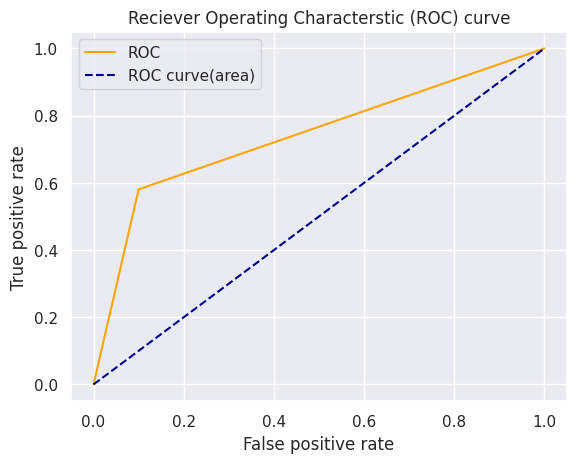

In [37]:
plt.plot(fpr,tpr,color='orange',label='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='ROC curve(area)')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Reciever Operating Characterstic (ROC) curve')
plt.legend()
plt.show()

In [38]:
import bz2,pickle
file=bz2.BZ2File('modelForPrediction.pkl','wb')
pickle.dump(log_reg,file)
file.close()

In [39]:
!pip install flask

In [40]:
pip install flask_cors

In [43]:
from wsgiref import simple_server
from flask import Flask, request, app,render_template
from flask import Response
from flask_cors import CORS
import pickle
import bz2
import numpy as np
import pandas as pd


app = Flask(__name__)
CORS(app)
app.config['DEBUG'] = True

scalarobject=bz2.BZ2File("standardScalar.pkl", "rb")
scaler=pickle.load(scalarobject)
modelforpred = bz2.BZ2File("modelForPrediction.pkl", "rb")
model = pickle.load(modelforpred)

## Route for homepage

@app.route('/')
def index():
    return render_template('index.html')

## Route for Single data point prediction
@app.route('/predictdata',methods=['GET','POST'])
def predict_datapoint():
    result=""

    if request.method=='POST':

        Pregnancies=int(request.form.get("Pregnancies"))
        Glucose = float(request.form.get('Glucose'))
        BloodPressure = float(request.form.get('BloodPressure'))
        SkinThickness = float(request.form.get('SkinThickness'))
        Insulin = float(request.form.get('Insulin'))
        BMI = float(request.form.get('BMI'))
        DiabetesPedigreeFunction = float(request.form.get('DiabetesPedigreeFunction'))
        Age = float(request.form.get('Age'))

        new_data=scaler.transform([[Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age]])
        predict=model.predict(new_data)

        if predict[0] ==1 :
            result = 'Diabetic'
        else:
            result ='Non-Diabetic'

        return render_template('single_prediction.html',result=result)

    else:
        return render_template('home.html')


if __name__=="__main__":
    app.run(host="0.0.0.0")

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
